Doesn't matter if the first prompt works, what matters most is 
the process for getting to prompts that works for your application.

Have a good process 
to iteratively make your prompt better, then you'll 
be able to come to something that works 
well for the task you want to achieve. 
 

# Iterative Prompt Develelopment
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

Using a diagram with machine learning development, you often have an idea and 
then implement it.

So, write the code, get the data, 
train your model, and that gives you an experimental result. And you 
can then look at that output, maybe do error analysis, figure out 
where it's working or not working, and then 
maybe even change your idea of exactly what problem 
you want to solve or how to approach 
it. And then change implementation and run another experiment and so 
on, and iterate over and over to get 
to an effective machine learning model.

Idea -> Implementation (code/data) -> Experimental result -> Error Analysis -> Repeat All

#### Prompt guidelines
- Be clear and specific
- Analyze why result does not give desired output.
- Refine the idea and the prompt
- Repeat

I personally have not 
paid as much attention to the internet articles 
that say 30 perfect prompts, because I think, 
there probably isn't a perfect prompt for 
everything under the sun. It's more important that you have 
a process for developing a good prompt for 
your specific application. 

![Iterative](iterative.png)

## Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

## Generate a marketing product description from a product fact sheet

In [ ]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


*OUTPUT*

Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. This chair is part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, all designed with a timeless mid-century aesthetic.

One of the standout features of this chair is the variety of customization options available. You can choose from several shell colors and base finishes to perfectly match your existing decor. The chair is available with either plastic back and front upholstery or full upholstery in a range of 10 fabric and 6 leather options, allowing you to create a look that is uniquely yours.

The chair is also available with or without armrests, giving you the flexibility to choose the option that best suits your needs. The base finish options include stainless steel, matte black, gloss white, or chrome, ensuring that you can find the perfect match for your space.

In terms of construction, this chair is built to last. It features a 5-wheel plastic coated aluminum base, providing stability and mobility. The pneumatic chair adjust allows for easy raise and lower action, ensuring optimal comfort throughout the day.

When it comes to dimensions, this chair is designed with both style and comfort in mind. With a width of 53 cm (20.87"), depth of 51 cm (20.08"), and height of 80 cm (31.50"), it offers ample space without overwhelming your space. The seat height is 44 cm (17.32") and the seat depth is 41 cm (16.14"), providing a comfortable seating experience for users of all heights.

We understand that every space is unique, which is why we offer a range of options to further customize your chair. You can choose between soft or hard-floor caster options, ensuring that your chair glides smoothly across any surface. Additionally, you have the choice between two seat foam densities: medium (1.8 lb/ft3) or high (2.8 lb/ft3), allowing you to select the level of support that suits your preferences. The chair is also available with armless design or 8 position PU armrests, providing additional comfort and versatility.

When it comes to materials, this chair is crafted with the utmost attention to quality. The shell base glider is made from cast aluminum with a modified nylon PA6/PA66 coating, ensuring durability and longevity. The shell thickness is 10 mm, providing a sturdy and reliable structure. The seat is made from HD36 foam, offering a comfortable and supportive seating experience.

Finally, this chair is proudly made in Italy, known for its exceptional craftsmanship and design. With its combination of style, functionality, and customization options, this mid-century inspired office chair is the perfect choice for those seeking a timeless and elegant addition to their workspace.

Please note that this chair is qualified for contract use, making it suitable for a wide range of professional settings. Upgrade your office or home with this exceptional piece of furniture and experience the perfect blend of style and comfort.

He did a nice job but it's too long

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

# clarifing my prompt by saying use at most 50 words.

*OUTPUT*

Introducing our mid-century inspired office chair, part of a stunning furniture collection. With various color and finish options, choose between plastic or full upholstery in fabric or leather. The chair features a durable aluminum base with 5 wheels and pneumatic height adjustment. Perfect for home or business use. Made in Italy.

In [ ]:
# let's check the length
len(response.split(" "))

*OUTPUT*

52

It's actually not bad. 
Large language models are okay, but not that great 
at following instructions about a very precise word 
count.

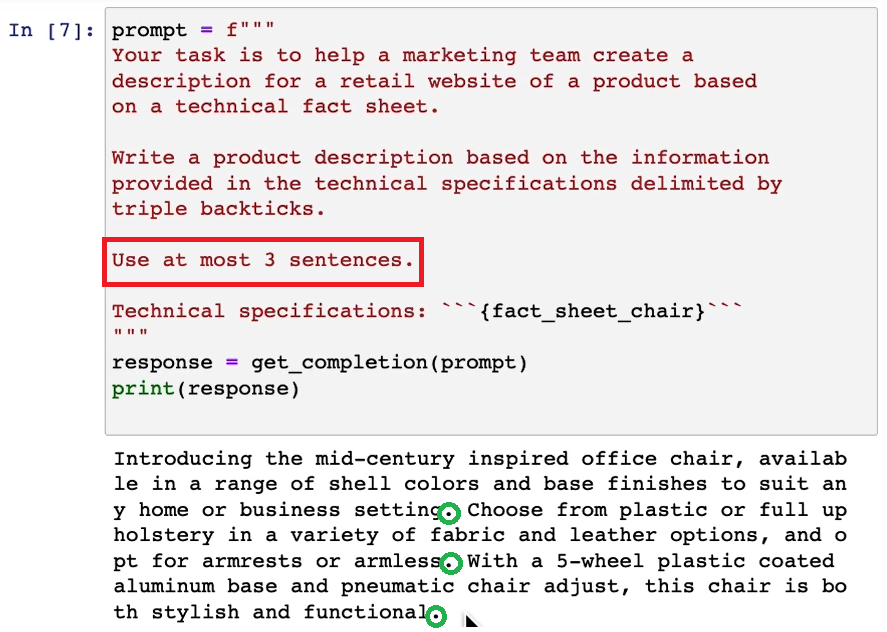

Modify the prompt to more precise ->  about tecnical details

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

*OUTPUT*

Introducing our mid-century inspired office chair, part of a beautiful furniture collection. With various shell colors and base finishes, it offers versatility for any setting. Choose between plastic or full upholstery in a range of fabric and leather options. The chair features a durable aluminum base with 5-wheel design and pneumatic chair adjustment. Made in Italy.

 I might decide at the end of the 
description, I also wanted to include the product ID.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

*OUTPUT*

Introducing our mid-century inspired office chair, part of a beautiful family of furniture. This chair offers a range of options, including different shell colors and base finishes. Choose between plastic or full upholstery in various fabric and leather options. The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. With its sleek design and high-quality materials, this chair is suitable for both home and business settings. Available with or without armrests, it also comes with soft or hard-floor caster options. The seat foam density can be customized to your preference, with options for medium or high density. Made in Italy, this chair is a perfect addition to any office space.

Product IDs: SWC-100, SWC-110


#### what I usually do is keep best practices like that in mind, be clear and specific, and if necessary, give the model time to think. With those in mind, it's worthwhile to often take a first attempt at writing a prompt, see what happens, and then go from there to iteratively refine the prompt to get closer and closer to the result that you need.

## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [ ]:
# in practice, you end up with a prompt like this, really only after multiple iterations.

prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

*OUTPUT*

```html
<div>
  <h2>Product Description</h2>
  <p>
    Introducing our latest addition to our mid-century inspired office furniture collection - the SWC Chair. This chair is part of a beautiful family of furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. With its sleek design and customizable options, the SWC Chair is the perfect choice for any home or business setting.
  </p>
  <p>
    The SWC Chair offers several options for customization. You can choose from a variety of shell colors and base finishes to match your existing decor. The chair is available with plastic back and front upholstery or full upholstery in a range of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. You can also choose whether to have armrests or not, depending on your preference.
  </p>
  <p>
    The construction of the SWC Chair is top-notch. It features a 5-wheel plastic coated aluminum base, ensuring stability and durability. The chair also has a pneumatic adjuster, allowing for easy raise and lower action. This makes it convenient for users to find their desired height and maintain proper posture throughout the day.
  </p>
  <p>
    The SWC Chair is designed with comfort in mind. The seat is made with HD36 foam, providing a plush and supportive cushioning experience. You can also choose between soft or hard-floor caster options, depending on the type of flooring in your space. Additionally, there are two choices of seat foam densities available: medium (1.8 lb/ft3) or high (2.8 lb/ft3). This allows you to customize the level of firmness to suit your preferences.
  </p>
  <p>
    The SWC Chair is not only stylish and comfortable, but it is also built to last. The shell base glider is made of cast aluminum with a modified nylon PA6/PA66 coating, ensuring strength and durability. The shell thickness is 10 mm, providing stability and support. With its high-quality materials and construction, the SWC Chair is qualified for contract use, making it suitable for commercial settings as well.
  </p>
  <p>
    The SWC Chair is proudly made in Italy, known for its craftsmanship and attention to detail. With its timeless design and superior quality, this chair is sure to enhance any space it is placed in.
  </p>
  <h2>Product Dimensions</h2>
  <table>
    <tr>
      <th>Dimension</th>
      <th>Measurement (inches)</th>
    </tr>
    <tr>
      <td>Width</td>
      <td>20.87"</td>
    </tr>
    <tr>
      <td>Depth</td>
      <td>20.08"</td>
    </tr>
    <tr>
      <td>Height</td>
      <td>31.50"</td>
    </tr>
    <tr>
      <td>Seat Height</td>
      <td>17.32"</td>
    </tr>
    <tr>
      <td>Seat Depth</td>
      <td>16.14"</td>
    </tr>
  </table>
</div>

Product IDs: SWC-100, SWC-110


## Load Python libraries to view HTML

In [ ]:
from IPython.display import display, HTML

In [ ]:
display(HTML(response))

*OUTPUT*

<div>
  <h2>Product Description</h2>
  <p>
    Introducing our latest addition to our mid-century inspired office furniture collection - the SWC Chair. This chair is part of a beautiful family of furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. With its sleek design and customizable options, the SWC Chair is the perfect choice for any home or business setting.
  </p>
  <p>
    The SWC Chair offers several options for customization. You can choose from a variety of shell colors and base finishes to match your existing decor. The chair is available with plastic back and front upholstery or full upholstery in a range of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. You can also choose whether to have armrests or not, depending on your preference.
  </p>
  <p>
    The construction of the SWC Chair is top-notch. It features a 5-wheel plastic coated aluminum base, ensuring stability and durability. The chair also has a pneumatic adjuster, allowing for easy raise and lower action. This makes it convenient for users to find their desired height and maintain proper posture throughout the day.
  </p>
  <p>
    The SWC Chair is designed with comfort in mind. The seat is made with HD36 foam, providing a plush and supportive cushioning experience. You can also choose between soft or hard-floor caster options, depending on the type of flooring in your space. Additionally, there are two choices of seat foam densities available: medium (1.8 lb/ft3) or high (2.8 lb/ft3). This allows you to customize the level of firmness to suit your preferences.
  </p>
  <p>
    The SWC Chair is not only stylish and comfortable, but it is also built to last. The shell base glider is made of cast aluminum with a modified nylon PA6/PA66 coating, ensuring strength and durability. The shell thickness is 10 mm, providing stability and support. With its high-quality materials and construction, the SWC Chair is qualified for contract use, making it suitable for commercial settings as well.
  </p>
  <p>
    The SWC Chair is proudly made in Italy, known for its craftsmanship and attention to detail. With its timeless design and superior quality, this chair is sure to enhance any space it is placed in.
  </p>
  <h2>Product Dimensions</h2>
  <table>
    <tr>
      <th>Dimension</th>
      <th>Measurement (inches)</th>
    </tr>
    <tr>
      <td>Width</td>
      <td>20.87"</td>
    </tr>
    <tr>
      <td>Depth</td>
      <td>20.08"</td>
    </tr>
    <tr>
      <td>Height</td>
      <td>31.50"</td>
    </tr>
    <tr>
      <td>Seat Height</td>
      <td>17.32"</td>
    </tr>
    <tr>
      <td>Seat Depth</td>
      <td>16.14"</td>
    </tr>
  </table>
</div>

Product IDs: SWC-100, SWC-110

#### Iterative Process
- Try something
- Analyze where the result does not give what you want
- Clarify instructions, give more time to think

This only with complex / mature applications
- Refine prompts with a batch of examples

#### the key to being an effective prompt engineer isn't so much about knowing the perfect prompt, it's about having a good process to develop prompts that are effective for your application.

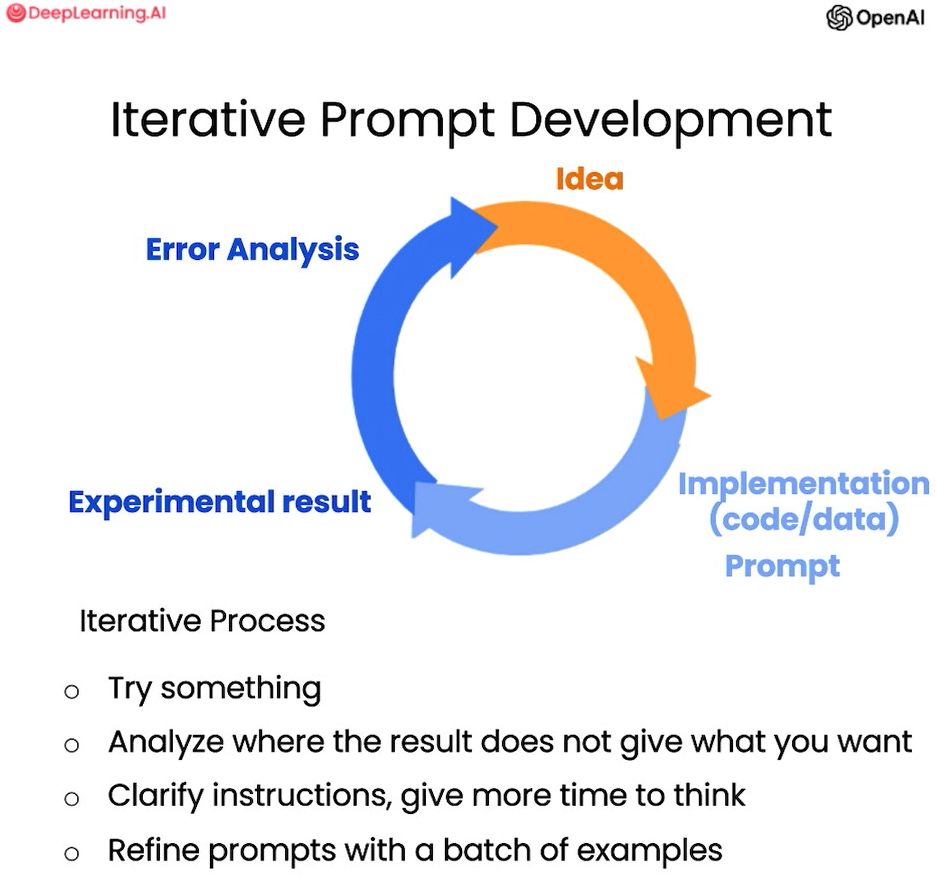

In this video, I illustrated 
developing a prompt using just one example. For more 
sophisticated applications, sometimes you will have multiple 
examples, say a list of 10 or even 50 
or 100 fact sheets, and iteratively develop a prompt and 
evaluate it against a large set of cases. 
But for the early development of most applications, 
I see many people developing it sort of the way I am, 
with just one example, but then for more mature applications, 
sometimes it could be useful to evaluate prompts against 
a larger set of examples, such as to test 
different prompts on dozens of fact sheets to 
see how is average or worst case performances 
on multiple fact sheets. But usually, you end up doing 
that only when an application is more mature, 
and you have to have those metrics to 
drive that incremental last few steps of prompt improvement.